---
title: 'FRBSTATS Data'
subtitle: 'Get current statistical data from FRBSTATS'
author: Murthadza bin Aznam</br>
date: '2022-09-15'

---

:::{.callout-note}
 📌 Goal: get data from [FRBStats](https://www.herta-experiment.org/)
:::


In [2]:
import requests
import logging
import pandas as pd
import matplotlib.pyplot as plt
from mw_plot import MWSkyMap
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

%matplotlib inline

In [3]:
def request_data(url, **kwargs) -> requests.Response:
    logging.debug(f"Awaiting data from {url}")
    return requests.get(url, **kwargs)

async def download_csv(url:str='https://www.herta-experiment.org/frbstats/catalogue.csv', output_file='../data/raw/external/data.csv') -> str:
    result = request_data(url)
    if result.status_code != 200:
        raise requests.RequestException(result.status_code)
    with open(output_file, 'w') as f:
        f.write(result.content.decode(result.encoding))
        logging.debug(f'Writing data to {output_file}')
    return output_file

In [4]:
data = pd.read_csv(await download_csv())
data.columns

Index(['frb', 'utc', 'mjd', 'telescope', 'ra', 'dec', 'l', 'b', 'frequency',
       'dm', 'flux', 'width', 'fluence', 'snr', 'reference', 'redshift',
       'redshift_measured', 'ra_error', 'dec_error', 'dm_error'],
      dtype='object')

<AxesSubplot: xlabel='redshift', ylabel='dm'>

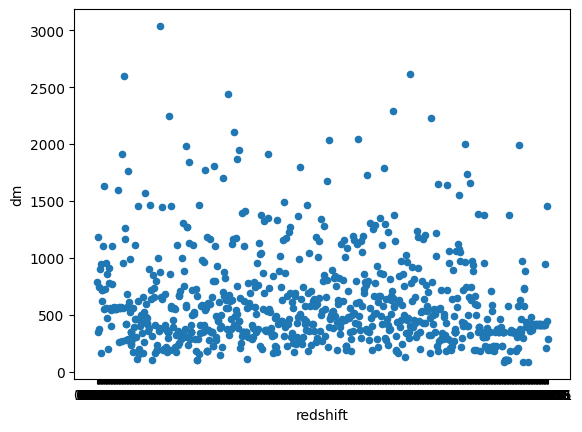

In [13]:
data.plot.scatter(x='redshift', y='dm')

<AxesSubplot: xlabel='l', ylabel='b'>

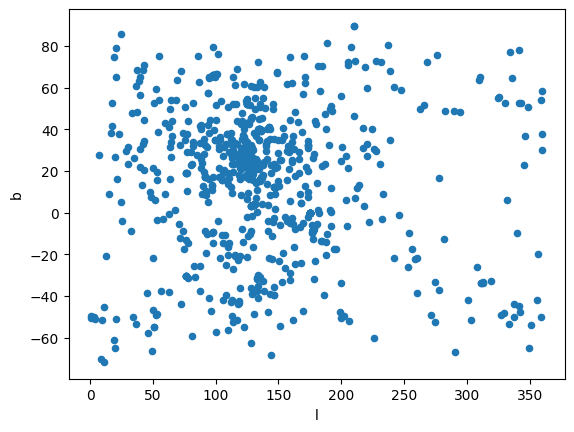

In [7]:
data.plot.scatter(x='l', y='b')

In [8]:
# Set projection & properties
canvas = MWSkyMap(projection='aitoff', grayscale=False, figsize=(20, 12.5))

# alpha value for the milkyway image
canvas.imalpha = 1.

# set up plot title
canvas.title = r'$\mathrm{FRB \ } l \mathrm{-} b \mathrm{ \ Distribution}$'+'\n'
canvas.fontsize = 48

In [26]:
coords = SkyCoord(ra=data['ra'][0], dec=data['dec'][0], unit=(u.hourangle, u.deg))
coords

<SkyCoord (ICRS): (ra, dec) in deg
    (286.72083333, -40.62055556)>

In [32]:
galcoords = SkyCoord(l=data['l'][0], b=data['b'][0], unit='deg', frame='galactic')
galcoords

<SkyCoord (Galactic): (l, b) in deg
    (356.64, -20.02)>

In [6]:
def to_sky_coord(row) -> SkyCoord:
    return SkyCoord(l=row['l'], b=row['b'], unit='deg', frame='galactic')

data['galactic'] = data.apply(lambda x: to_sky_coord(x), axis=1)

data

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,snr,reference,redshift,galactic
0,FRB 20010125A,2001-01-25 0:29:16,51934.02032,Parkes,19:06:53,-40:37:14,356.64,-20.02,-,790.3,0.54,-,-,-,https://www.wis-tns.org/object/20010125a,0.7083,"<SkyCoord (Galactic): (l, b) in deg\n (356...."
1,FRB 20010305A,2001-03-05 12:29:16,51973.52032,Parkes,4:57:20,-52:36:25,260.07,-38.35,1374,350.0,0.42,9,3.78,10.2,https://arxiv.org/abs/2004.04601,0.341,"<SkyCoord (Galactic): (l, b) in deg\n (260...."
2,FRB 20010312A,2001-03-12 11:06:48,51980.46306,Parkes,5:26:55,-64:56:19,274.72,-33.30,-,1187.0,0.25,-,-,-,https://www.wis-tns.org/object/20010312a,1.0897,"<SkyCoord (Galactic): (l, b) in deg\n (274...."
3,FRB 20010621A,2001-06-21 13:02:11,52081.54318,Parkes,18:52:05,-8:29:35,25.43,-4.00,-,745.0,0.41,-,-,-,https://www.wis-tns.org/object/20010621a,0.4454,"<SkyCoord (Galactic): (l, b) in deg\n (25.4..."
4,FRB 20010724A,2001-07-24 19:50:02,52114.82641,Parkes,1:18:06,-75:12:18,300.65,-41.81,-,375.0,30,-,-,-,https://www.wis-tns.org/object/20010724a,0.369,"<SkyCoord (Galactic): (l, b) in deg\n (300...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,FRB 20220105A,2022-01-05 0:19:19,59584.01341,ASKAP,13:55:51.4,+22:29:19.7,18.84,74.68,1632.5,583.0,-,-,-,10,https://www.wis-tns.org/object/20220105a,0.5724,"<SkyCoord (Galactic): (l, b) in deg\n (18.8..."
807,FRB 20220414A,2022-04-14 17:26:40,59683.72685,Tianlai,13:04:21,+48:18:05,117.02,68.68,747.5,208.1,128.4,2.2,204,15.1,https://www.wis-tns.org/object/20220414a,0.2169,"<SkyCoord (Galactic): (l, b) in deg\n (117...."
808,FRB 20220501C,2022-05-01 2:11:09,59700.09108,ASKAP,23:29:50,-32:27:00,11.26,-71.55,863.5,449.5,-,-,30,16.1,https://www.wis-tns.org/object/20220501c,0.4558,"<SkyCoord (Galactic): (l, b) in deg\n (11.2..."
809,FRB 20220610A,2022-06-10 22:26:43,59740.93522,ASKAP,23:23:60,-33:31:00,8.87,-70.13,1271.5,1458.1,-,5.6,43,29.8,https://www.wis-tns.org/object/20220610a,1.3836,"<SkyCoord (Galactic): (l, b) in deg\n (8.87..."


In [20]:
canvas.scatter(ra=data['ra'].to_numpy()*u.degree, dec=data['dec'].to_numpy()*u.degree, s=150, alpha=0.6, edgecolor='white', linewidth=0.85, cmap='plasma')

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Unit'